# HOUSING PRICE PREDICTION
PROJECT 2

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

# Loading the data sets:

In [2]:
df_train=pd.read_csv("Housing_price_train.csv")
#pd.set_option('display.max_columns',None)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df_test=pd.read_csv("Housing_price_test.csv")
#pd.set_option('display.max_rows',None)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [4]:
print("No: of Rows and columns for Train data set : ",df_train.shape)
print("No: of Rows and columns for Test data set  : ",df_test.shape)

No: of Rows and columns for Train data set :  (1168, 81)
No: of Rows and columns for Test data set  :  (292, 80)


In [5]:
df_train["dataset_type"]="Train"
df_test["dataset_type"]="Test"

In [6]:
df_concat=pd.concat([df_train,df_test],ignore_index=True)

In [7]:
df_concat.shape

(1460, 82)

In [8]:
df_concat["dataset_type"].value_counts()

Train    1168
Test      292
Name: dataset_type, dtype: int64

In [9]:
df_concat.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
dataset_type        2
Length: 82, dtype: int64

In [10]:
df_concat.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
dataset_type      object
Length: 82, dtype: object

In [11]:
df_concat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0,Train
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0,Train
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0,Train
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0,Train
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0,Train


In [12]:
df_concat.isnull().sum()[df_concat.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice        292
dtype: int64

In [13]:
df_concat.select_dtypes(include='object').isnull().sum()[df_concat.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
df_concat.select_dtypes(include=['int64','float']).isnull().sum()[df_concat.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
SalePrice      292
dtype: int64

In [15]:
df_concat['LotFrontage'].value_counts().sum()

1201

In [16]:
df_concat['LotFrontage'].median()

69.0

In [17]:
df_concat['MasVnrArea'].median()

0.0

In [18]:
df_concat['LotFrontage'] = df_concat['LotFrontage'].replace(np.nan, df_concat['LotFrontage'].median())
df_concat['MasVnrArea'] = df_concat['MasVnrArea'].replace(np.nan, df_concat['MasVnrArea'].median())

In [19]:
df_concat['GarageYrBlt']=df_concat['GarageYrBlt'].fillna(0)
df_concat['GarageYrBlt'] = df_concat['GarageYrBlt'].astype(int)

In [20]:
print(df_concat.Alley.value_counts())
print('')
print(df_concat.Street.value_counts())
print(" ")
print(df_concat.Utilities.value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64
 
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [21]:
df_concat = df_concat.drop(['Alley','Street','Utilities','PoolQC','Fence','MiscFeature','Id'],axis='columns')

In [22]:
df_concat.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
df_concat.MasVnrType.fillna('None',inplace=True)
df_concat.BsmtQual.fillna('TA',inplace=True)
df_concat.BsmtCond.fillna('TA',inplace=True)
df_concat.BsmtExposure.fillna('No',inplace=True)
df_concat.BsmtFinType1.fillna('Unf',inplace=True)
df_concat.BsmtFinType2.fillna('Unf',inplace=True)
df_concat.GarageType.fillna('Attchd',inplace=True)
df_concat.GarageFinish.fillna('Unf',inplace=True)
df_concat.GarageQual.fillna('TA',inplace=True)
df_concat.GarageCond.fillna('TA',inplace=True)
df_concat.Electrical.fillna('SBrkr',inplace=True)
df_concat.FireplaceQu.fillna('Gd',inplace=True)

In [24]:
df_concat.select_dtypes(include='object').isnull().sum()[df_concat.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

In [25]:
# Check if there are any duplicate values in the dataset

df_concat[df_concat.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type


In [26]:
df_concat.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,RL,69.0,4928,IR1,Lvl,Inside,Gtl,NPkVill,Norm,...,0,0,0,0,2,2007,WD,Normal,128000.0,Train
1,20,RL,95.0,15865,IR1,Lvl,Inside,Mod,NAmes,Norm,...,0,224,0,0,10,2007,WD,Normal,268000.0,Train
2,60,RL,92.0,9920,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,...,0,0,0,0,6,2007,WD,Normal,269790.0,Train
3,20,RL,105.0,11751,IR1,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,0,0,1,2010,COD,Normal,190000.0,Train
4,20,RL,69.0,16635,IR1,Lvl,FR2,Gtl,NWAmes,Norm,...,0,0,0,0,6,2009,WD,Normal,215000.0,Train


# EDA

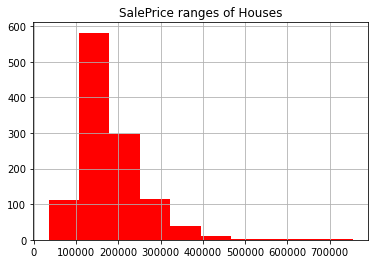

In [27]:
df_train["SalePrice"].hist(grid=True,color='red')
plt.title("SalePrice ranges of Houses")
plt.show()

<AxesSubplot:xlabel='YrSold', ylabel='count'>

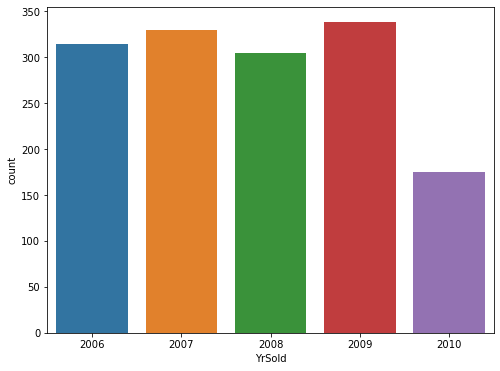

In [28]:
plt.subplots(figsize=(8,6))
sns.countplot(df_concat['YrSold'])

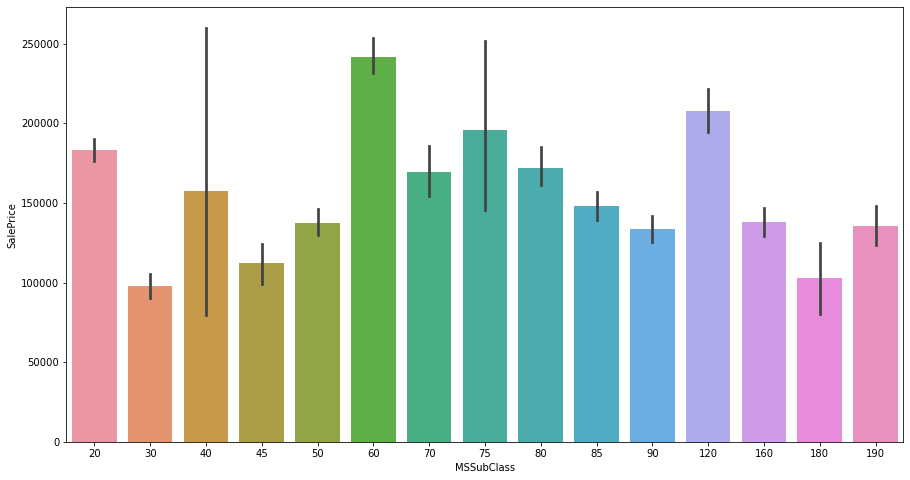

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(x="MSSubClass",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

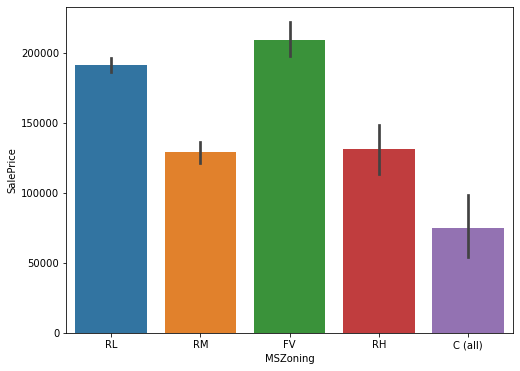

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="MSZoning",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

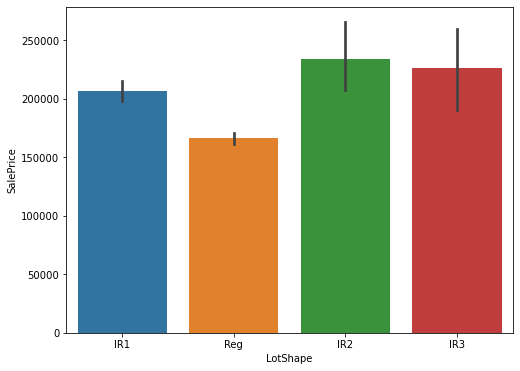

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x="LotShape",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

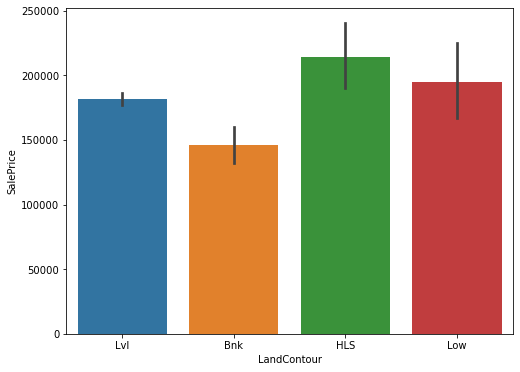

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x="LandContour",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

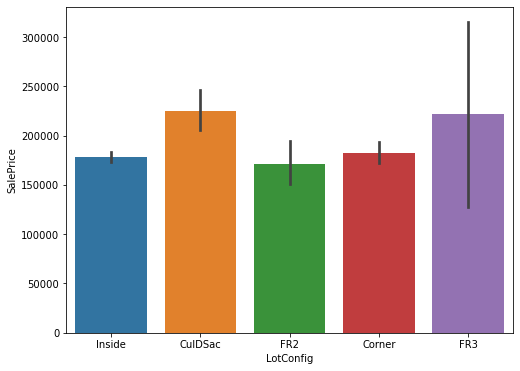

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="LotConfig",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

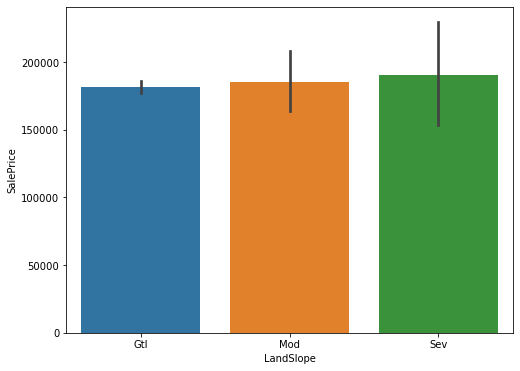

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x="LandSlope",y="SalePrice",data=df_concat)
#plt.xticks(rotation=90)
plt.show()

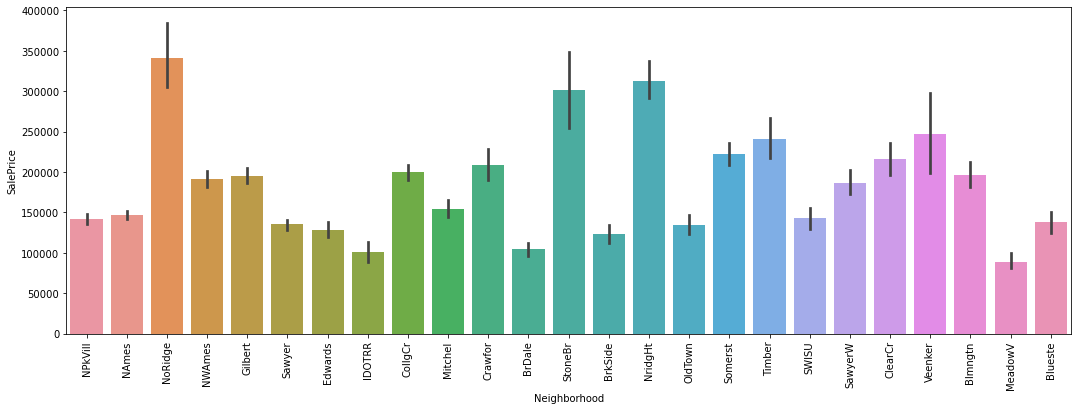

In [35]:
plt.figure(figsize=(18,6))
sns.barplot(x="Neighborhood",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

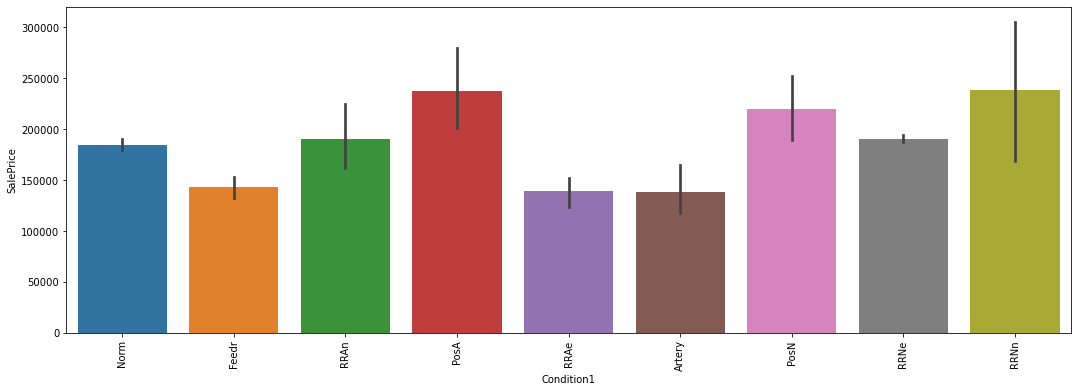

In [36]:
plt.figure(figsize=(18,6))
sns.barplot(x="Condition1",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

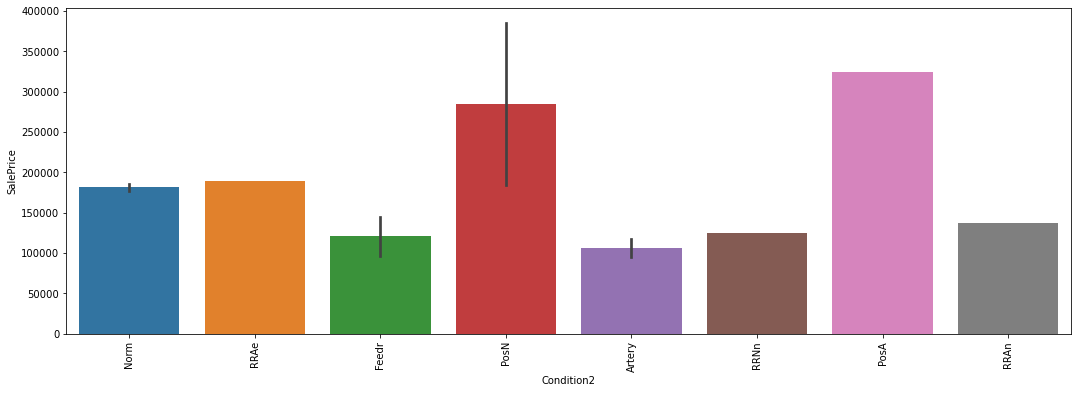

In [37]:
plt.figure(figsize=(18,6))
sns.barplot(x="Condition2",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

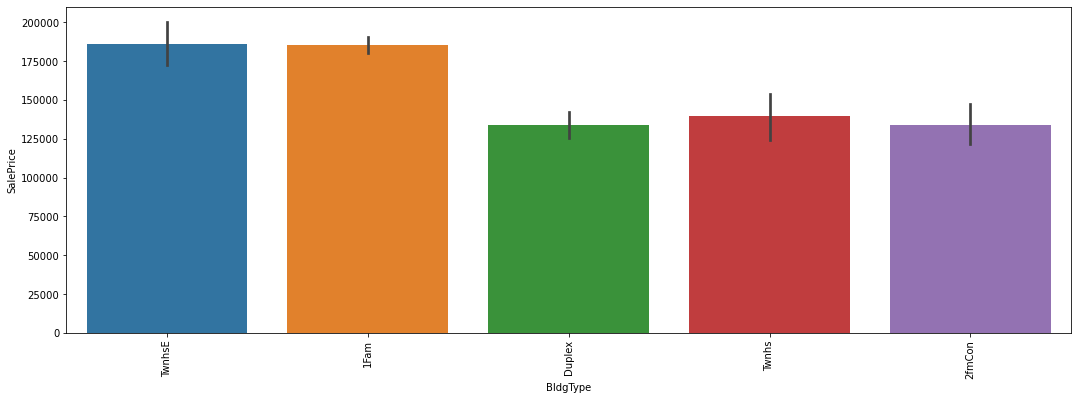

In [38]:
plt.figure(figsize=(18,6))
sns.barplot(x="BldgType",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

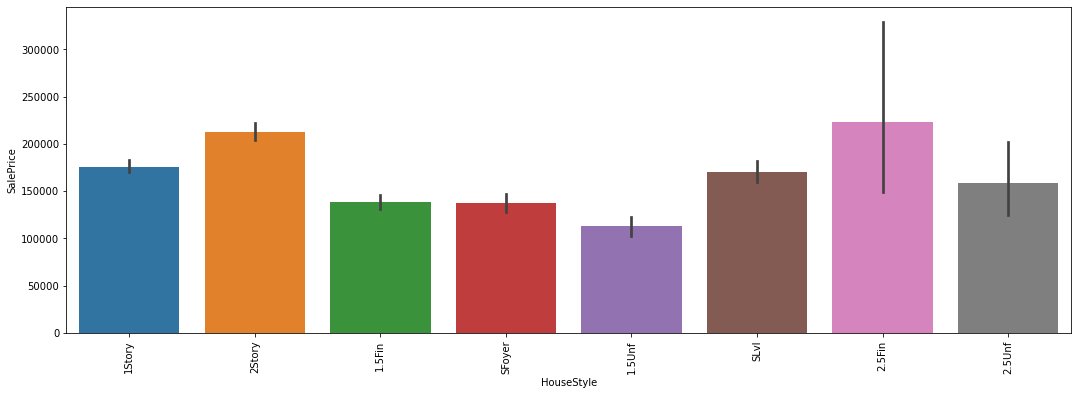

In [39]:
plt.figure(figsize=(18,6))
sns.barplot(x="HouseStyle",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

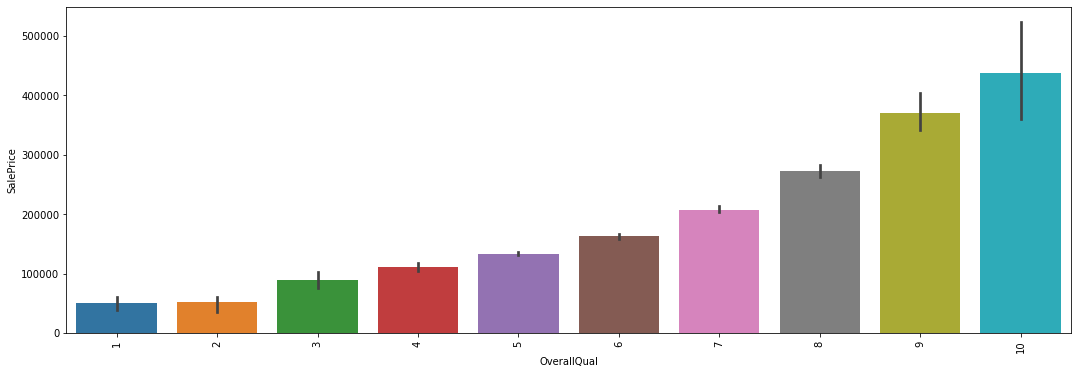

In [40]:
plt.figure(figsize=(18,6))
sns.barplot(x="OverallQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

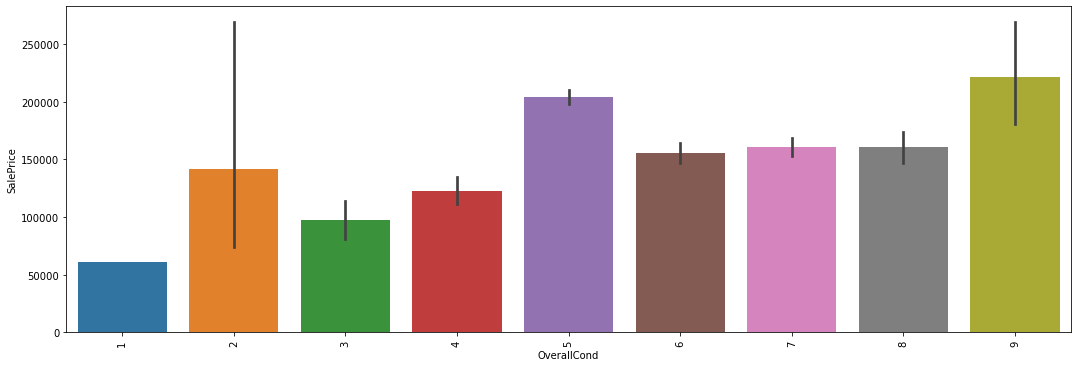

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x="OverallCond",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

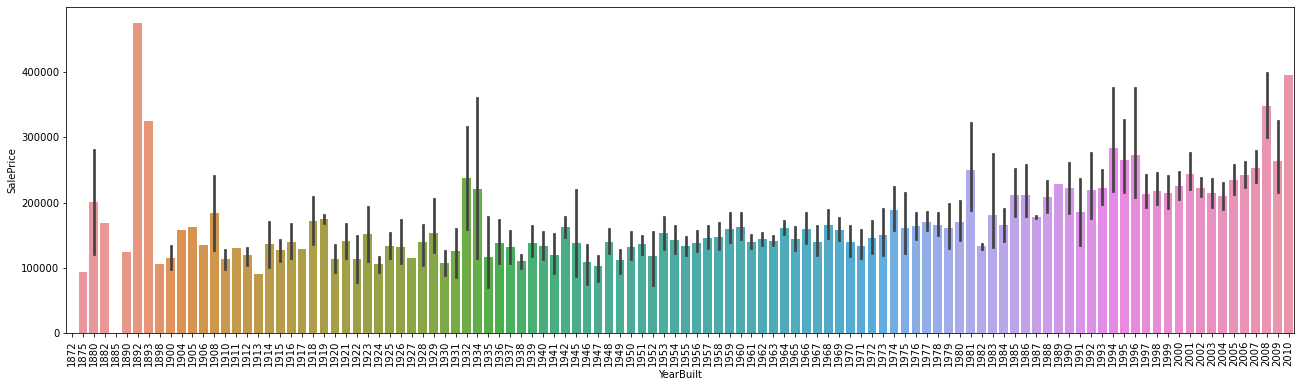

In [42]:
plt.figure(figsize=(22,6))
sns.barplot(x="YearBuilt",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

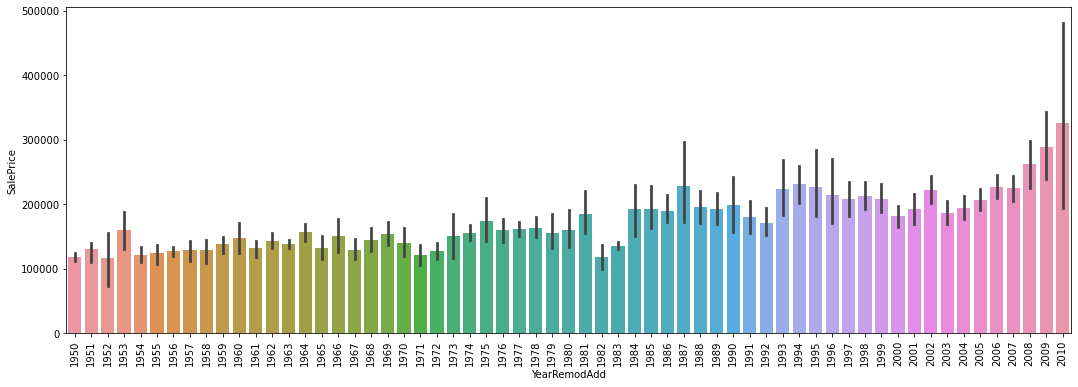

In [43]:
plt.figure(figsize=(18,6))
sns.barplot(x="YearRemodAdd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

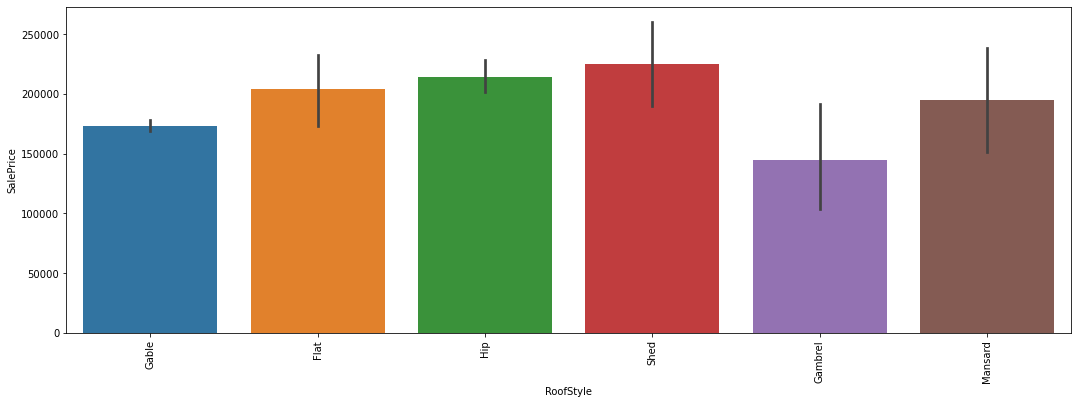

In [44]:
plt.figure(figsize=(18,6))
sns.barplot(x="RoofStyle",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

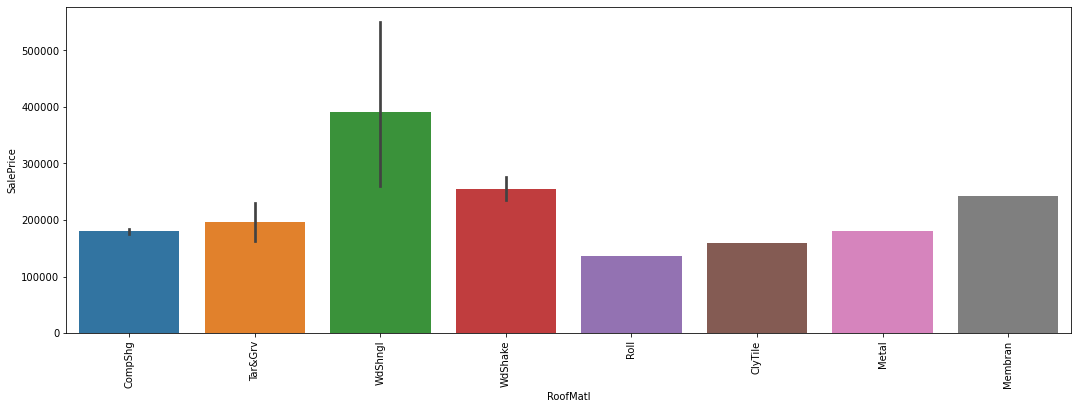

In [45]:
plt.figure(figsize=(18,6))
sns.barplot(x="RoofMatl",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

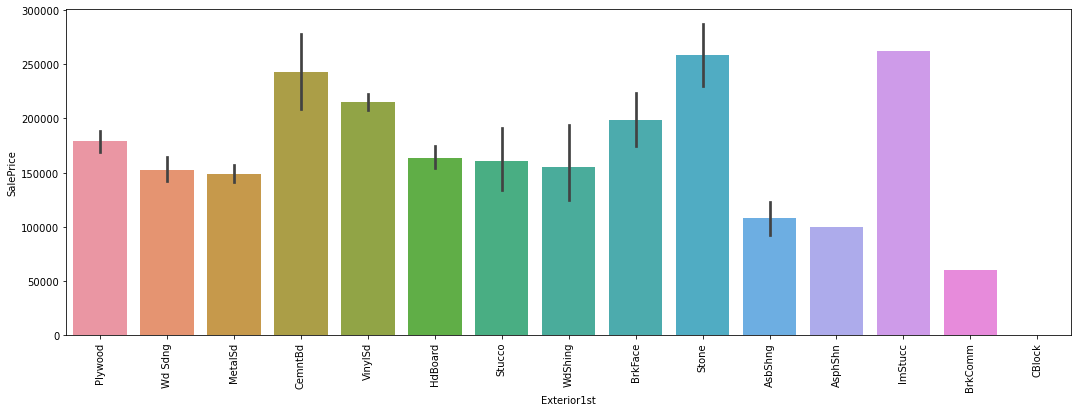

In [46]:
plt.figure(figsize=(18,6))
sns.barplot(x="Exterior1st",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

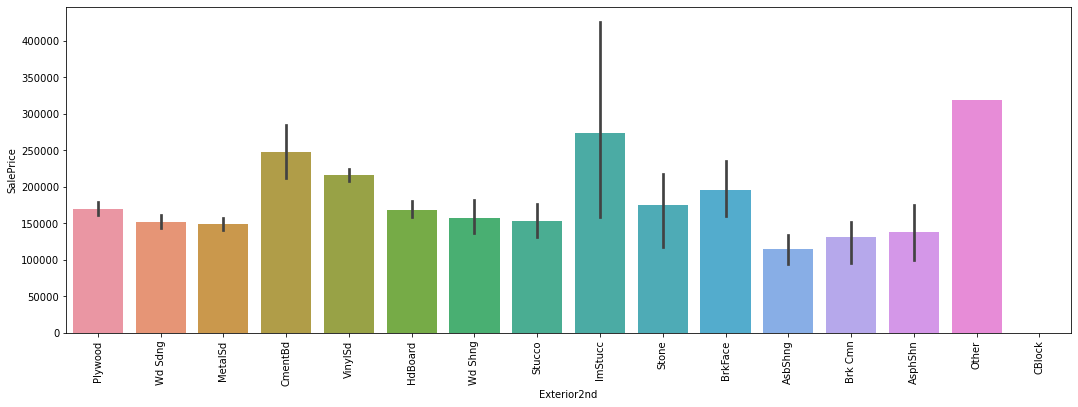

In [47]:
plt.figure(figsize=(18,6))
sns.barplot(x="Exterior2nd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

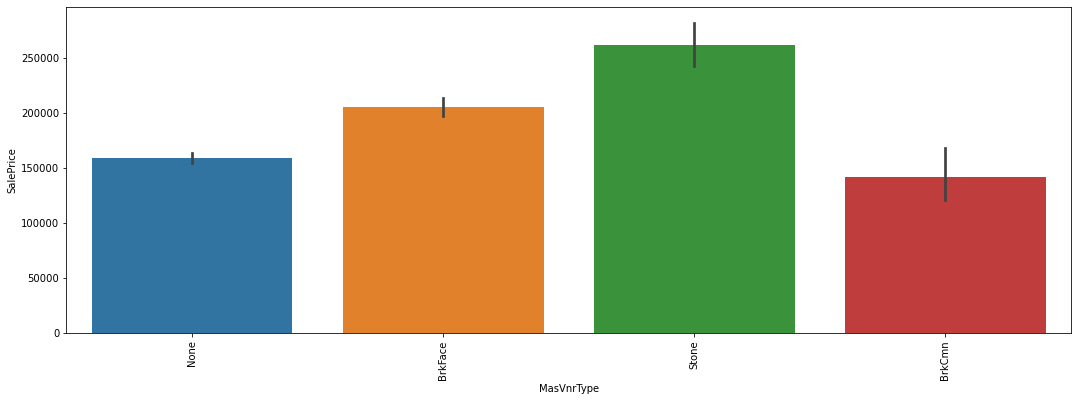

In [48]:
plt.figure(figsize=(18,6))
sns.barplot(x="MasVnrType",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

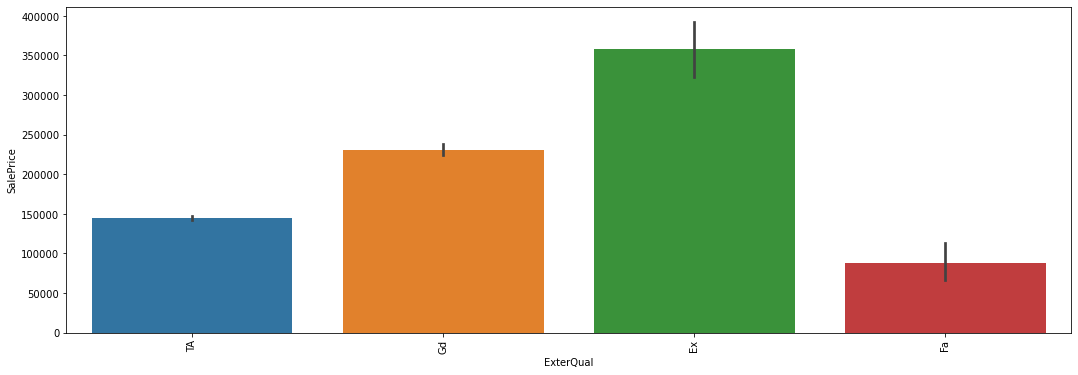

In [49]:
plt.figure(figsize=(18,6))
sns.barplot(x="ExterQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

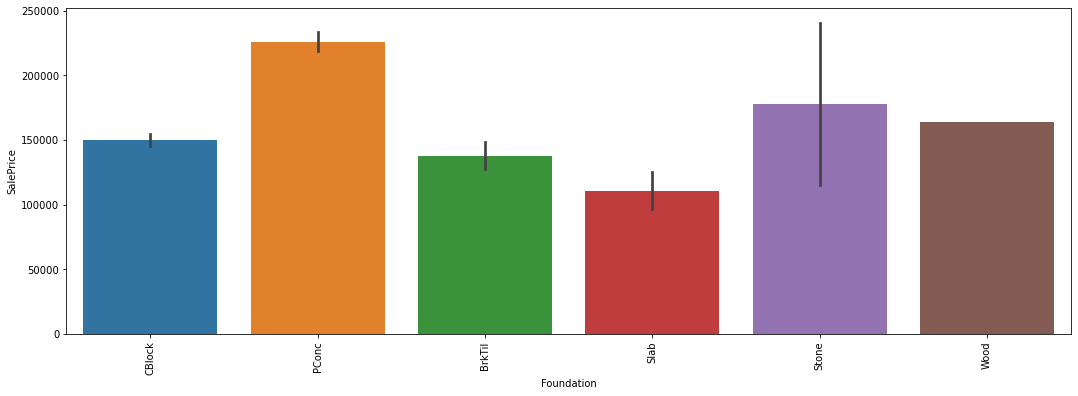

In [50]:
plt.figure(figsize=(18,6))
sns.barplot(x="Foundation",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

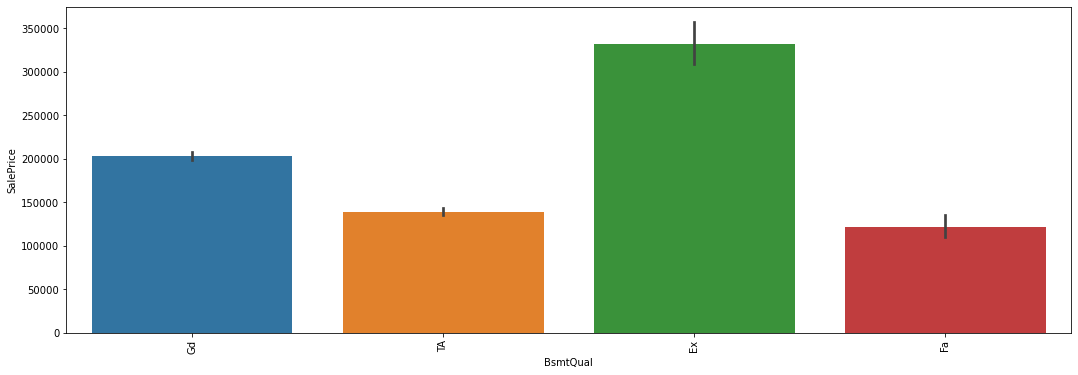

In [51]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

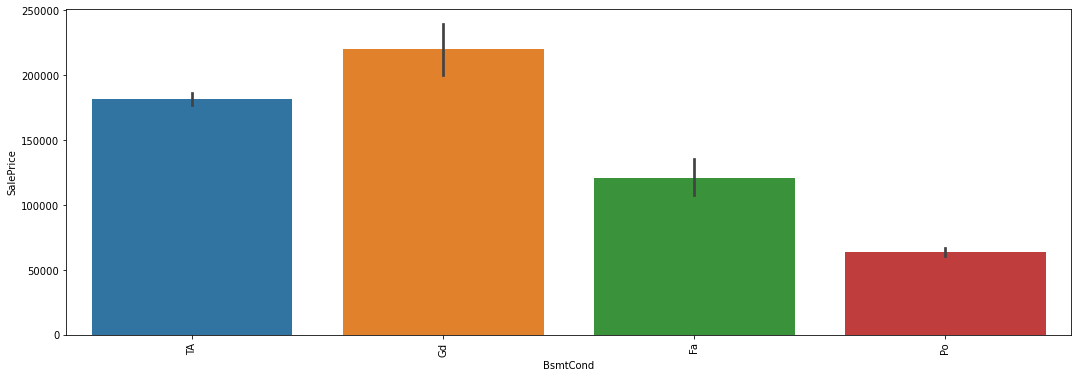

In [52]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtCond",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

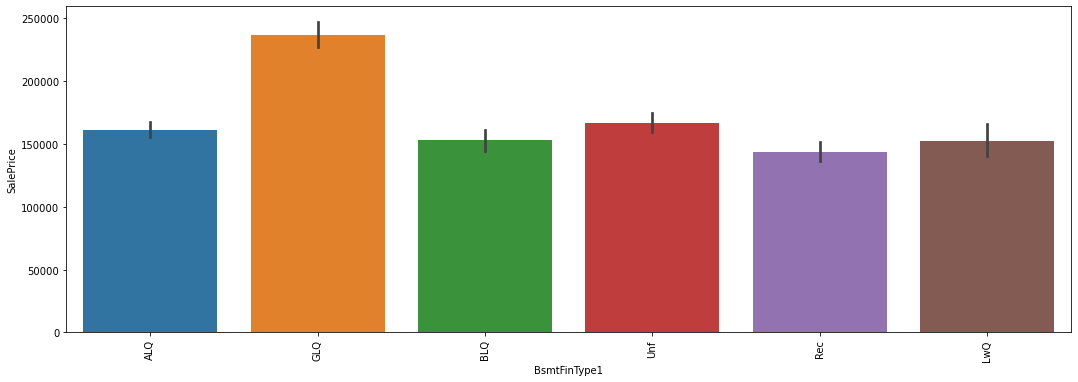

In [53]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFinType1",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

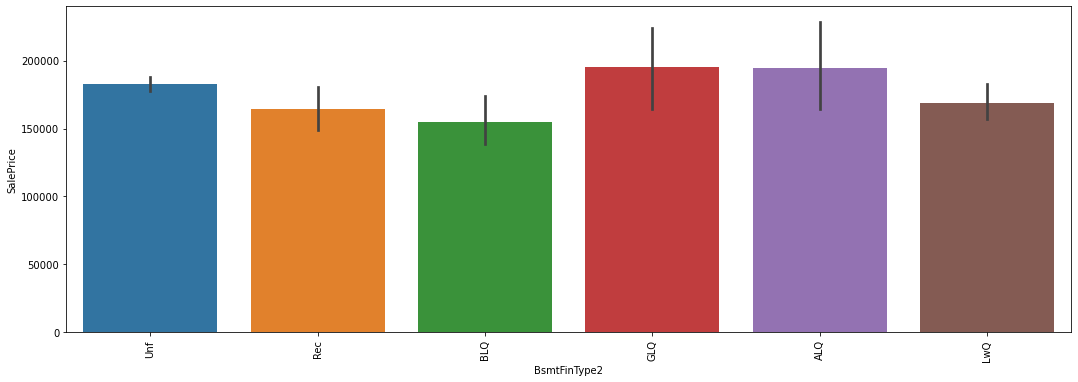

In [54]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFinType2",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

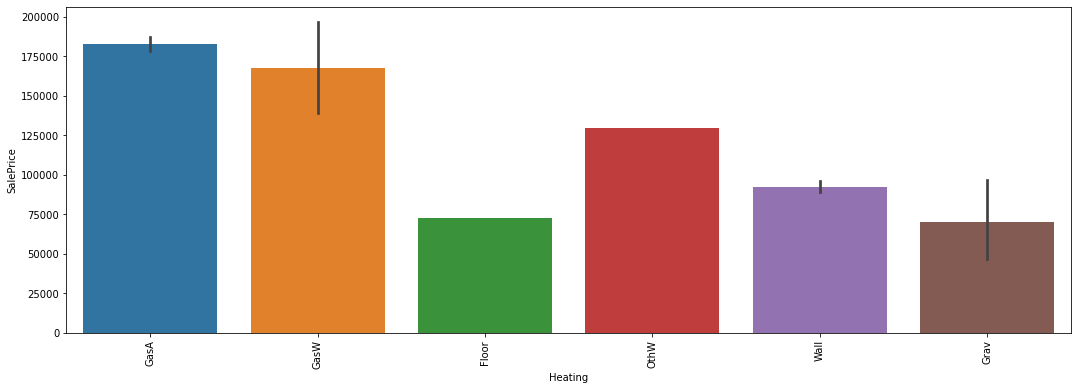

In [55]:
plt.figure(figsize=(18,6))
sns.barplot(x="Heating",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

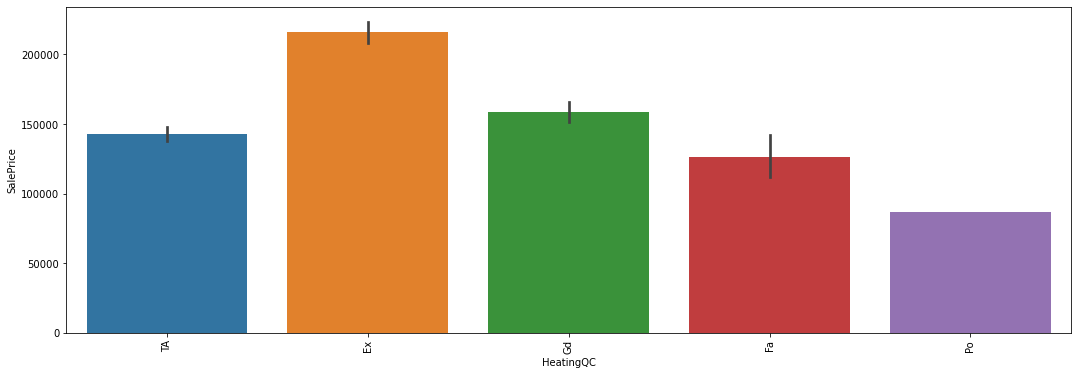

In [56]:
plt.figure(figsize=(18,6))
sns.barplot(x="HeatingQC",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

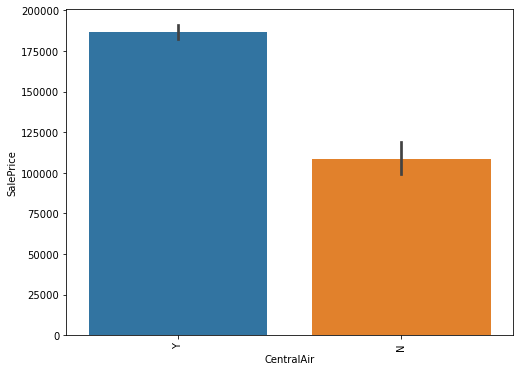

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(x="CentralAir",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

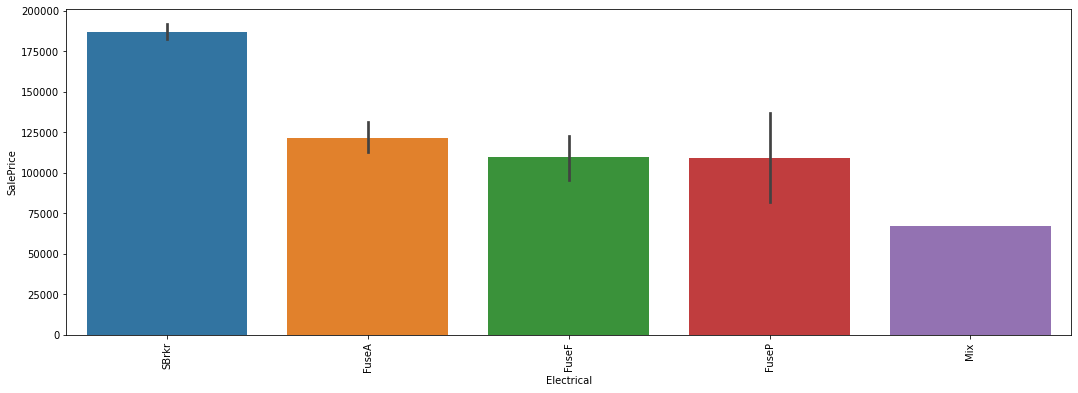

In [58]:
plt.figure(figsize=(18,6))
sns.barplot(x="Electrical",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

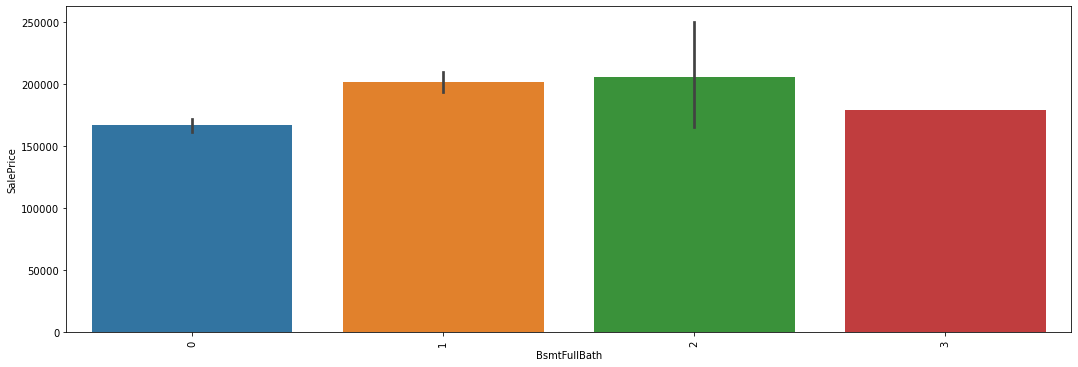

In [59]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtFullBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

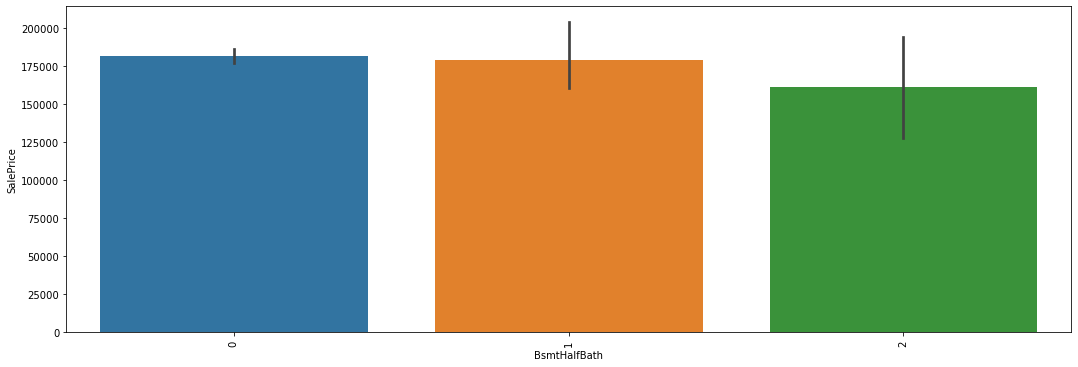

In [60]:
plt.figure(figsize=(18,6))
sns.barplot(x="BsmtHalfBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

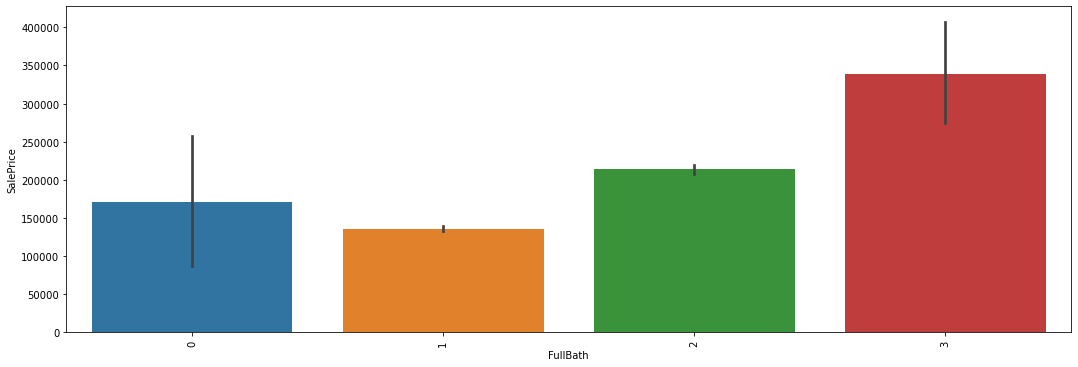

In [61]:
plt.figure(figsize=(18,6))
sns.barplot(x="FullBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

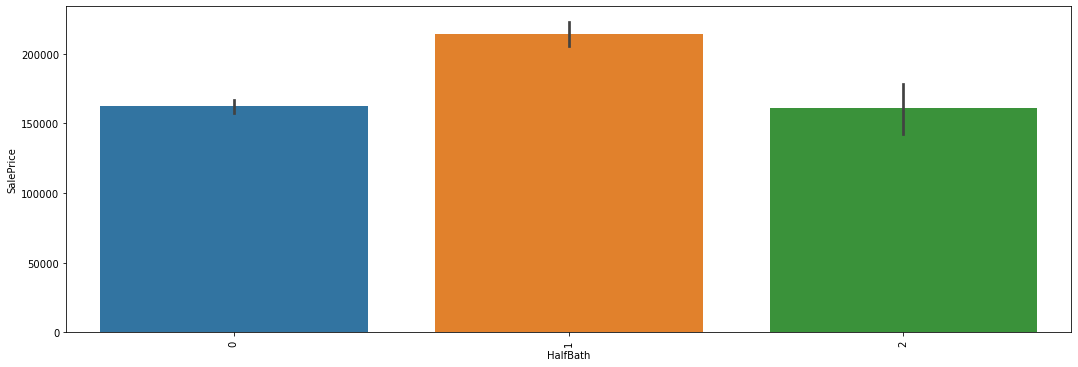

In [62]:
plt.figure(figsize=(18,6))
sns.barplot(x="HalfBath",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

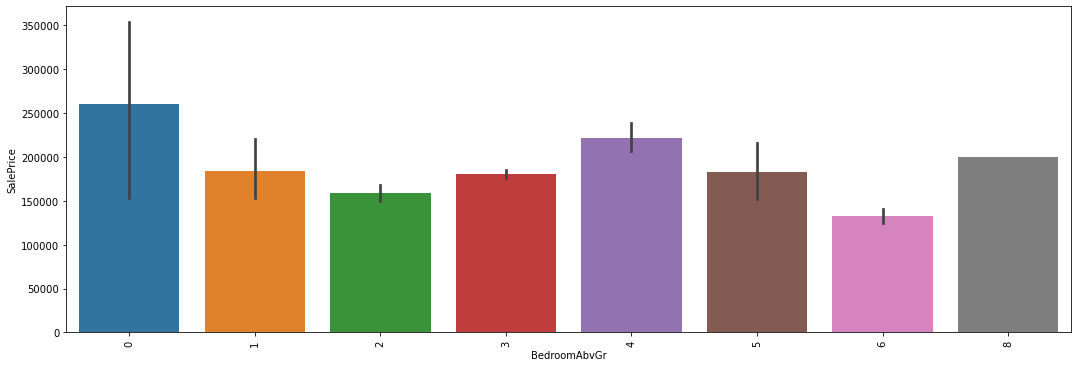

In [63]:
plt.figure(figsize=(18,6))
sns.barplot(x="BedroomAbvGr",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

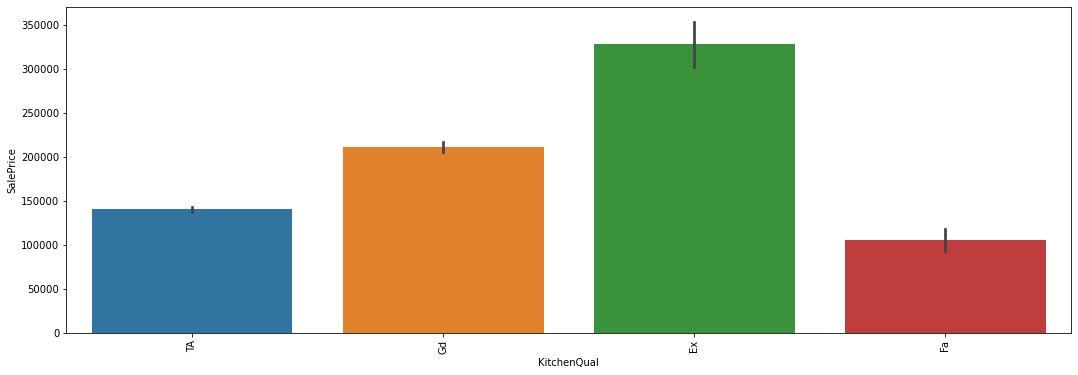

In [64]:
plt.figure(figsize=(18,6))
sns.barplot(x="KitchenQual",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

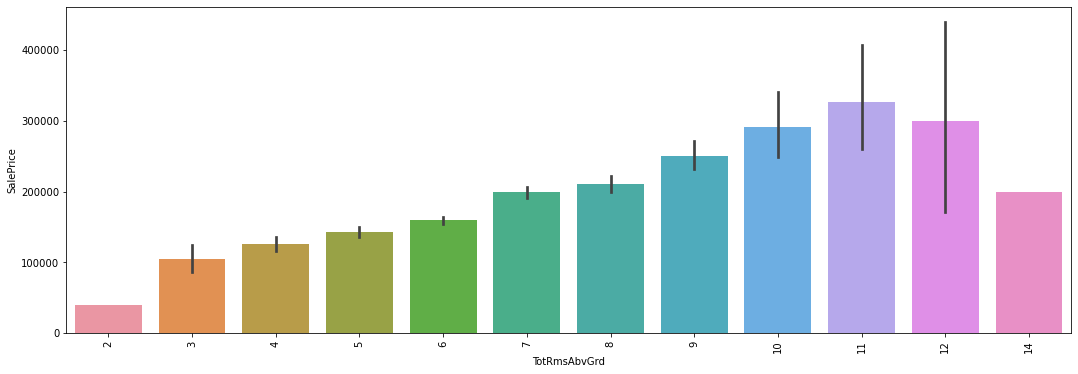

In [65]:
plt.figure(figsize=(18,6))
sns.barplot(x="TotRmsAbvGrd",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

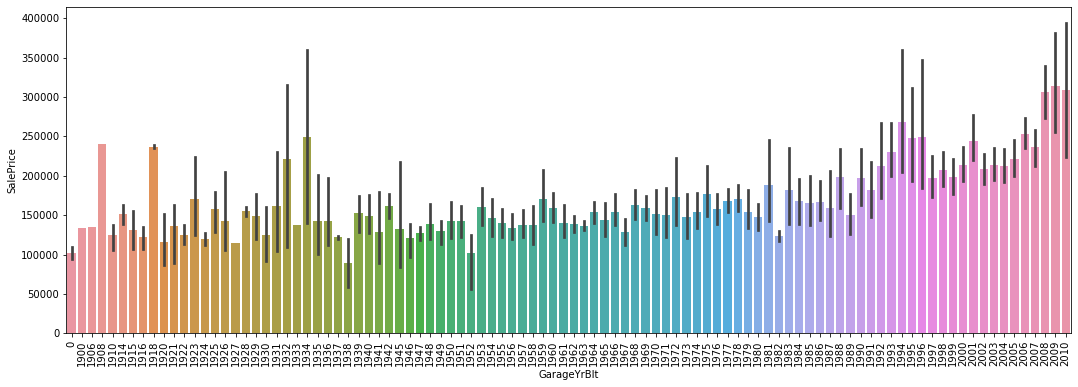

In [66]:
plt.figure(figsize=(18,6))
sns.barplot(x="GarageYrBlt",y="SalePrice",data=df_concat)
plt.xticks(rotation=90)
plt.show()

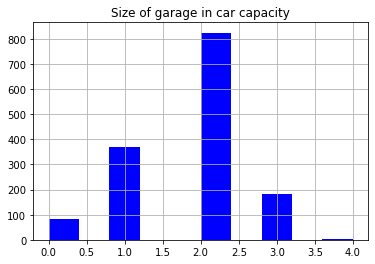

In [67]:
df_concat["GarageCars"].hist(grid=True,color='blue')
plt.title("Size of garage in car capacity")
plt.show()

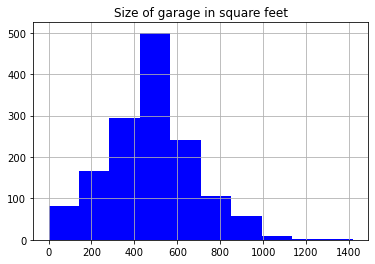

In [68]:
df_concat["GarageArea"].hist(grid=True,color='blue')
plt.title("Size of garage in square feet")
plt.show()

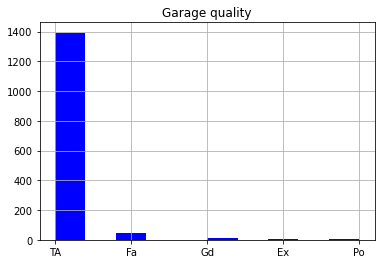

In [69]:
df_concat["GarageQual"].hist(grid=True,color='blue')
plt.title("Garage quality")
plt.show()

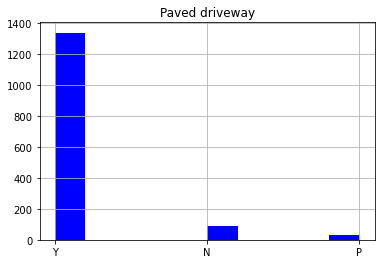

In [70]:
df_concat["PavedDrive"].hist(grid=True,color='blue')
plt.title("Paved driveway")
plt.show()

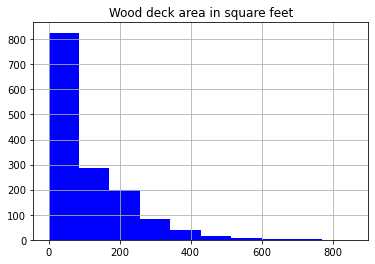

In [71]:
df_concat["WoodDeckSF"].hist(grid=True,color='blue')
plt.title("Wood deck area in square feet")
plt.show()

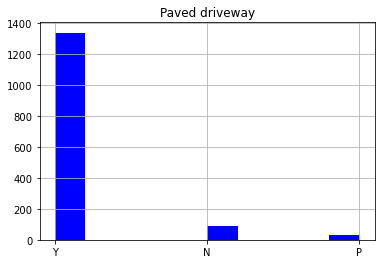

In [72]:
df_concat["PavedDrive"].hist(grid=True,color='blue')
plt.title("Paved driveway")
plt.show()

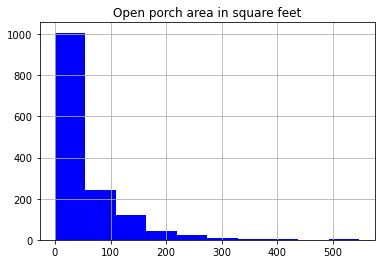

In [73]:
df_concat["OpenPorchSF"].hist(grid=True,color='blue')
plt.title("Open porch area in square feet")
plt.show()

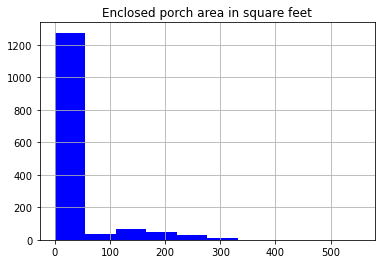

In [74]:
df_concat["EnclosedPorch"].hist(grid=True,color='blue')
plt.title("Enclosed porch area in square feet")
plt.show()

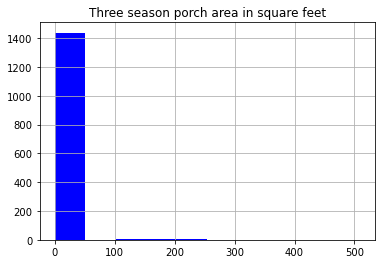

In [75]:
df_concat["3SsnPorch"].hist(grid=True,color='blue')
plt.title("Three season porch area in square feet")
plt.show()

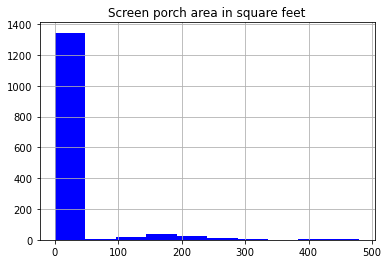

In [76]:
df_concat["ScreenPorch"].hist(grid=True,color='blue')
plt.title("Screen porch area in square feet")
plt.show()

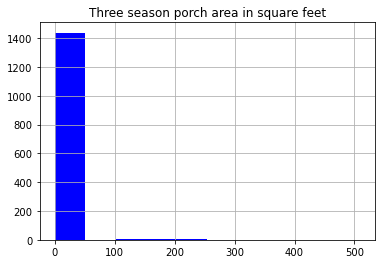

In [77]:
df_concat["3SsnPorch"].hist(grid=True,color='blue')
plt.title("Three season porch area in square feet")
plt.show()

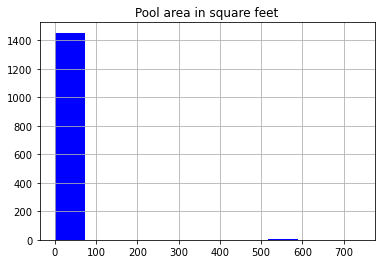

In [78]:
df_concat["PoolArea"].hist(grid=True,color='blue')
plt.title("Pool area in square feet")
plt.show()

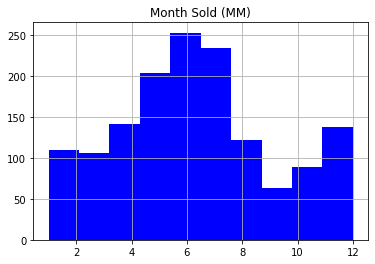

In [79]:
df_concat["MoSold"].hist(grid=True,color='blue')
plt.title("Month Sold (MM)")
plt.show()

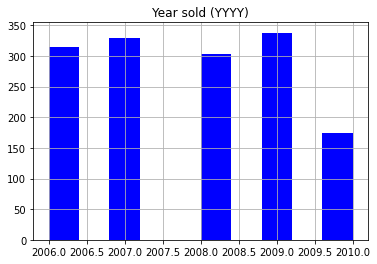

In [80]:
df_concat["YrSold"].hist(grid=True,color='blue')
plt.title("Year sold (YYYY)")
plt.show()

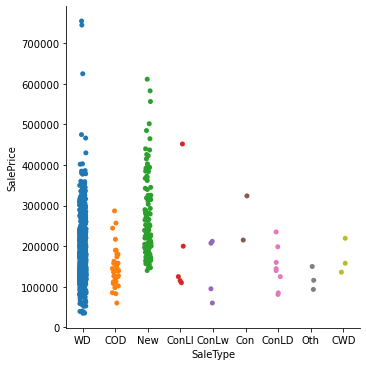

In [81]:
sns.catplot(x='SaleType',y='SalePrice',data=df_concat)

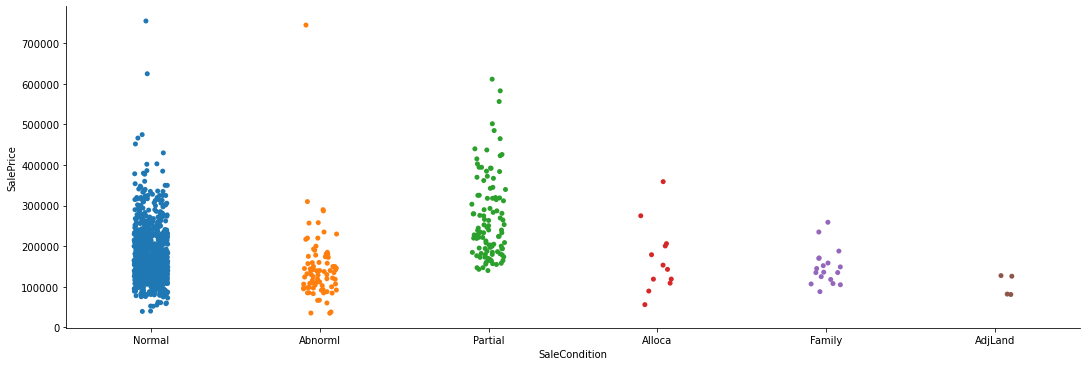

In [82]:
sns.catplot(x='SaleCondition',y='SalePrice',data = df_concat.sort_values("SalePrice", ascending = False), height = 5, aspect = 3)

(array([0, 1, 2]), [Text(0, 0, 'RFn'), Text(1, 0, 'Unf'), Text(2, 0, 'Fin')])

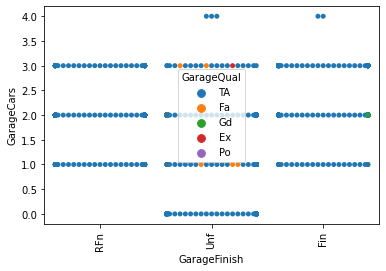

In [83]:
sns.swarmplot(x="GarageFinish", y="GarageCars",hue='GarageQual', data=df_concat)

plt.xticks(rotation=90)

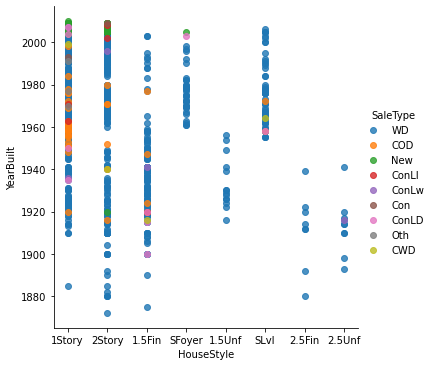

In [84]:
sns.lmplot(x ='HouseStyle', y ='YearBuilt',fit_reg = False, hue = 'SaleType',data = df_concat)

<AxesSubplot:xlabel='YrSold', ylabel='YearBuilt'>

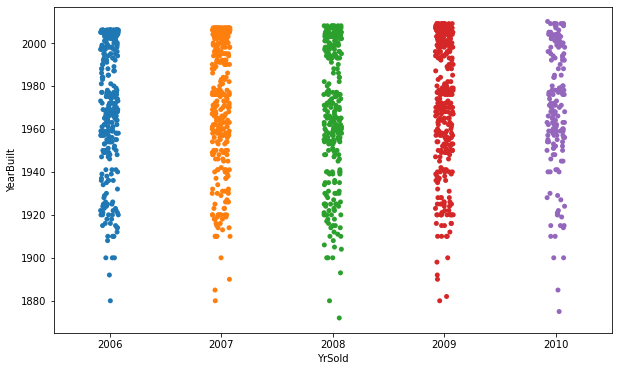

In [85]:
plt.figure(figsize=(10,6))
sns.stripplot(x="YrSold", y="YearBuilt", data=df_concat, jitter=.08)

<AxesSubplot:xlabel='HouseStyle', ylabel='OverallQual'>

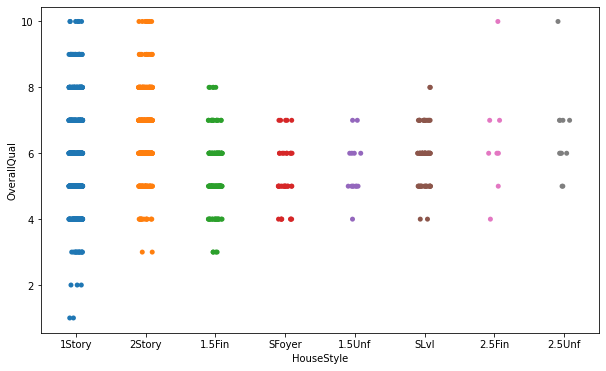

In [86]:
plt.figure(figsize=(10,6))
sns.stripplot(x="HouseStyle", y="OverallQual", data=df_concat, jitter=.1)

In [87]:
corr_mat=df_concat.corr()
corr_mat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.060775
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.323828
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.249499
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.789185
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.065642
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.514408
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507831
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.460535
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.362874
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.010151


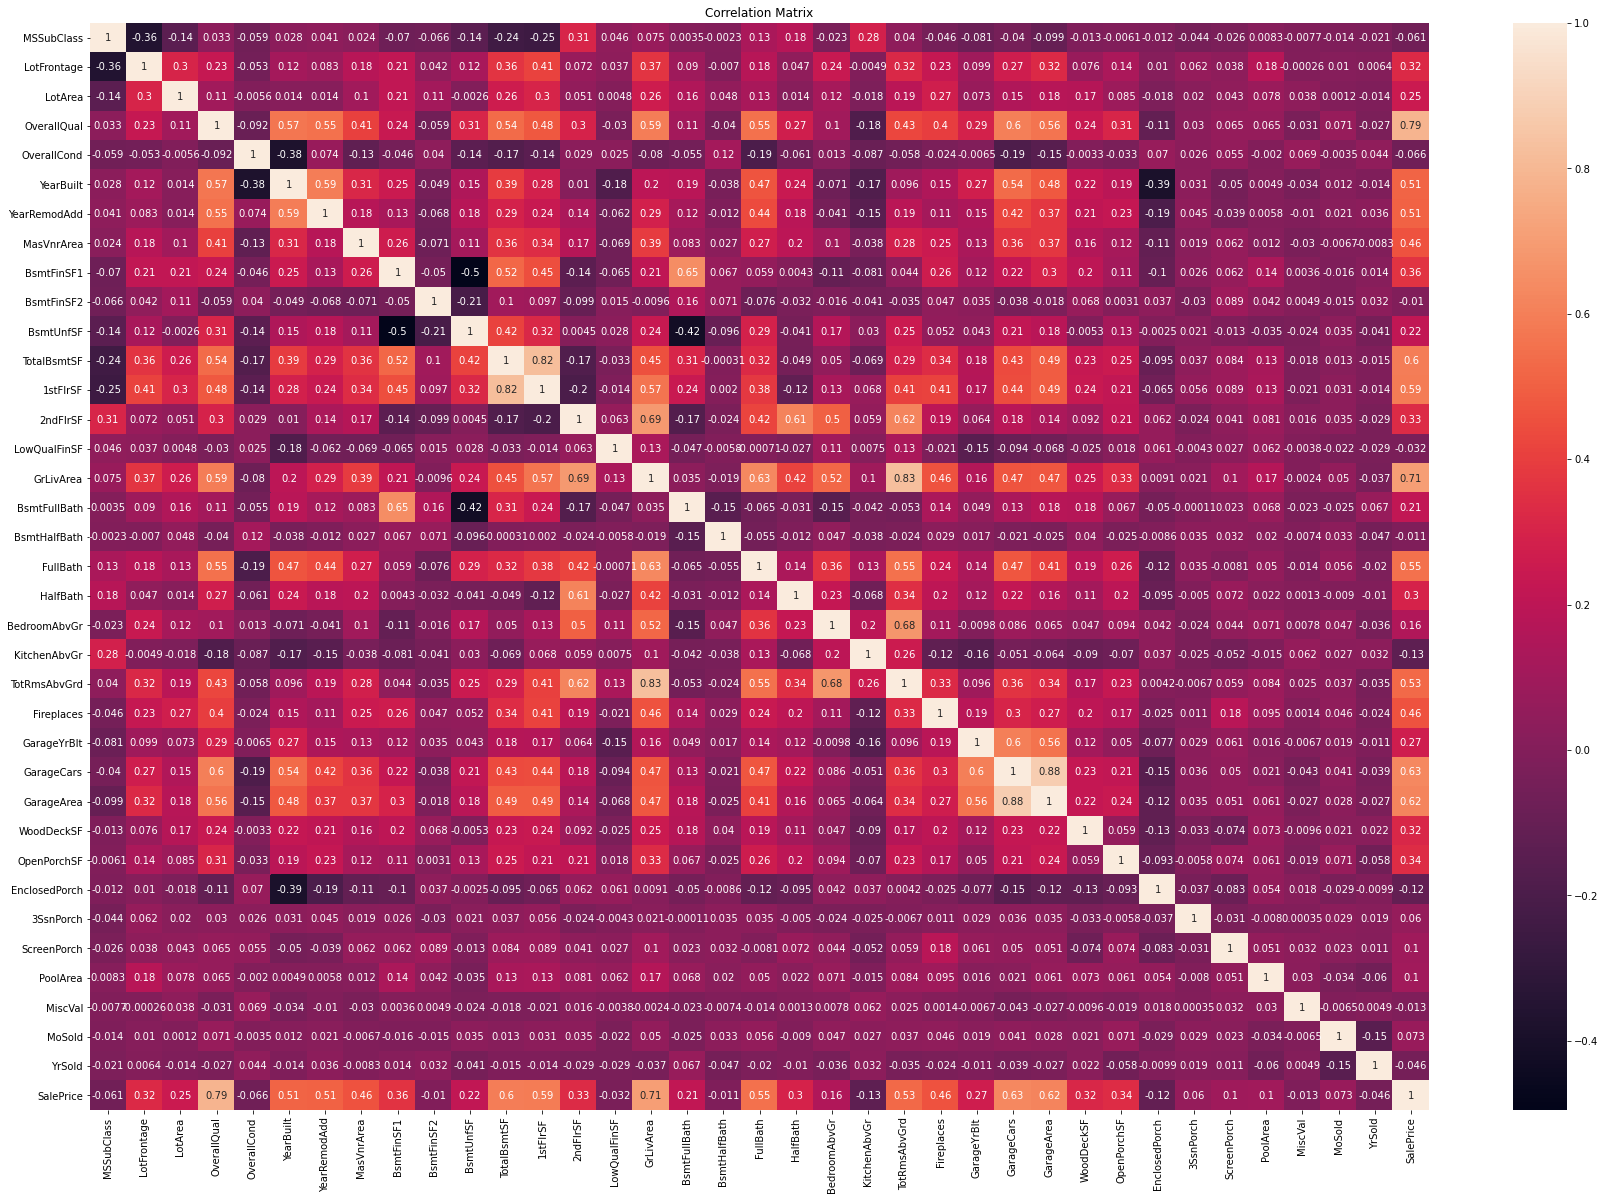

In [88]:
plt.figure(figsize=[30,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [89]:
df_concat.select_dtypes(include=['int64','float'])
#pd.set_option('display.max_columns',None)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,69.0,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000.0
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000.0
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790.0
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000.0
4,20,69.0,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,78.0,10206,8,5,2007,2007,468.0,33,0,...,144,99,0,0,0,0,0,10,2008,NaN
1456,20,57.0,9245,5,5,1994,1995,0.0,686,0,...,0,0,0,0,0,0,0,2,2008,NaN
1457,20,69.0,11241,6,7,1970,1970,180.0,578,0,...,0,0,0,0,0,0,700,3,2010,NaN
1458,50,50.0,5000,6,7,1947,1950,0.0,399,0,...,0,24,36,0,0,0,0,10,2006,NaN


In [90]:
df_concat.select_dtypes(include=['object'])
#pd.set_option('display.max_columns',None)

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,dataset_type
0,RL,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,Train
1,RL,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
2,RL,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,Train
3,RL,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal,Train
4,RL,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,Test
1456,RL,IR2,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test
1457,RL,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,...,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,Test
1458,RM,Reg,Lvl,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,Test


In [91]:
df_concat['LandSlope'] = df_concat.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df_concat['ExterQual'] = df_concat.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['BsmtQual'] = df_concat.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['BsmtCond'] = df_concat.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['BsmtExposure'] = df_concat.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df_concat['BsmtFinType1'] = df_concat.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_concat['BsmtFinType2'] = df_concat.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df_concat['HeatingQC'] = df_concat.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['CentralAir'] = df_concat.CentralAir.map({'N':0,'Y':1})
df_concat['KitchenQual'] = df_concat.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['GarageFinish'] = df_concat.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df_concat['GarageQual'] = df_concat.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['GarageCond'] = df_concat.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df_concat['ExterCond'] = df_concat.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['LotShape'] = df_concat.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
df_concat['FireplaceQu'] = df_concat.FireplaceQu.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df_concat['dataset_type'] = df_concat.dataset_type.map({'Train':0,'Test':1})

In [92]:

balance_object = df_concat.filter(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'], axis=1)
balance_object

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition
0,RL,Lvl,Inside,NPkVill,Norm,Norm,TwnhsE,1Story,Gable,CompShg,...,Plywood,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Flat,Tar&Grv,...,Wd Sdng,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
2,RL,Lvl,CulDSac,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,MetalSd,None,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
3,RL,Lvl,Inside,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,...,Plywood,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,COD,Normal
4,RL,Lvl,FR2,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,CmentBd,Stone,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Lvl,Inside,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,Stone,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1456,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,...,VinylSd,None,PConc,GasA,SBrkr,Typ,Detchd,Y,WD,Normal
1457,RL,Lvl,CulDSac,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal
1458,RM,Lvl,Corner,BrkSide,Feedr,Norm,1Fam,1.5Fin,Gable,CompShg,...,CmentBd,None,CBlock,GasA,SBrkr,Typ,Detchd,Y,WD,Normal


In [93]:
LE=LabelEncoder()
for column in balance_object:
    df_concat.loc[:,column] = LE.fit_transform(df_concat.loc[:,column])
df_concat

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
0,120,3,69.0,4928,0,3,4,0,13,2,...,0,0,0,0,2,2007,8,4,128000.0,0
1,20,3,95.0,15865,0,3,4,1,12,2,...,0,224,0,0,10,2007,8,4,268000.0,0
2,60,3,92.0,9920,0,3,1,0,15,2,...,0,0,0,0,6,2007,8,4,269790.0,0
3,20,3,105.0,11751,0,3,4,0,14,2,...,0,0,0,0,1,2010,0,4,190000.0,0
4,20,3,69.0,16635,0,3,2,0,14,2,...,0,0,0,0,6,2009,8,4,215000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20,3,78.0,10206,3,3,4,0,21,2,...,0,0,0,0,10,2008,8,4,NaN,1
1456,20,3,57.0,9245,1,3,4,0,5,2,...,0,0,0,0,2,2008,8,4,NaN,1
1457,20,3,69.0,11241,0,3,1,0,12,2,...,0,0,0,700,3,2010,8,4,NaN,1
1458,50,4,50.0,5000,3,3,0,0,3,1,...,0,0,0,0,10,2006,8,4,NaN,1


### Binning:

In [94]:
#Binning:
bins = [1860,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels = [i for i in range(10)]
df_concat['YearBuilt'] = pd.cut(df_concat['YearBuilt'], bins=bins, labels=labels, include_lowest=True)

In [95]:
df_concat['YearBuilt'] = df_concat['YearBuilt'].astype(int)

In [96]:
#Binning:
bins = [0,1875,1890,1905,1920,1935,1950,1965,1980,1995,2010]
labels = [i for i in range(10)]
df_concat['GarageYrBlt'] = pd.cut(df_concat['GarageYrBlt'], bins=bins, labels=labels, include_lowest=True)

In [97]:
df_concat['GarageYrBlt']= df_concat['GarageYrBlt'].astype(int)

In [98]:
#Binning:
bins = [0,2006,2007,2008,2009,2010]
labels = [i for i in range(5)]
df_concat['YrSold'] = pd.cut(df_concat['YrSold'], bins=bins, labels=labels, include_lowest=True)

In [99]:
df_concat['YrSold']= df_concat['YrSold'].astype(int)

# Lets Check Outliers with Box Plot:

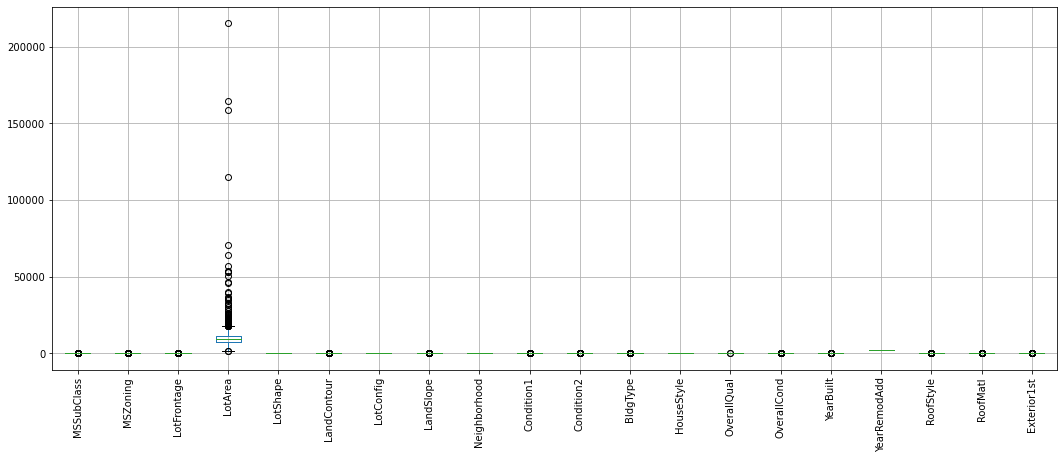

In [100]:
df_concat.iloc[:,0:20].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

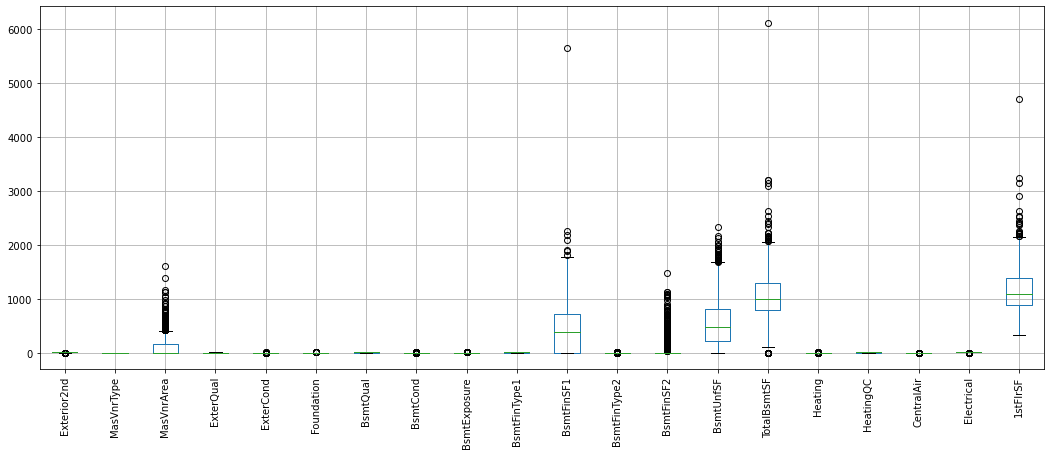

In [101]:
df_concat.iloc[:,20:40].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

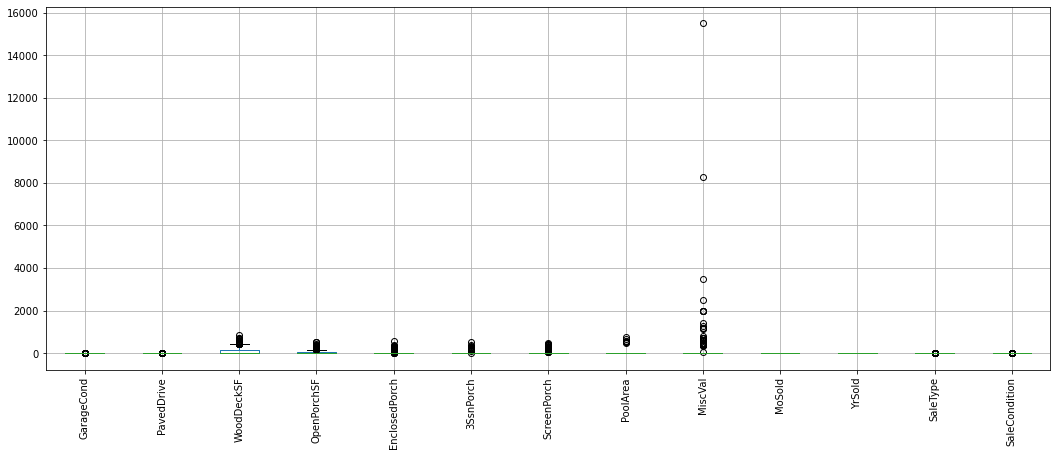

In [103]:
df_concat.iloc[:,60:73].boxplot(figsize=[18,8])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

# Outlier Removal:

In [104]:
from scipy.stats import zscore
z=np.abs(zscore(df_concat))
df_zscore=df_concat[(z<3).all(axis=1)]

In [105]:
df_zscore.shape

(0, 75)

In [106]:
df_concat.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset_type
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,1.942466,2.777397,3.019178,0.062329,12.251370,2.031507,...,3.409589,15.060959,2.758904,43.489041,6.321918,1.815753,7.513014,3.770548,181477.005993,0.200000
std,42.300571,0.632017,22.027677,9981.264932,1.409156,0.707666,1.622634,0.276232,6.013735,0.868515,...,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79105.586863,0.400137
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,3.000000,60.000000,7553.500000,0.000000,3.000000,2.000000,0.000000,7.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,8.000000,4.000000,130375.000000,0.000000
50%,50.000000,3.000000,69.000000,9478.500000,3.000000,3.000000,4.000000,0.000000,12.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,8.000000,4.000000,163995.000000,0.000000
75%,70.000000,3.000000,79.000000,11601.500000,3.000000,3.000000,4.000000,0.000000,17.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,8.000000,4.000000,215000.000000,0.000000
max,190.000000,4.000000,313.000000,215245.000000,3.000000,3.000000,4.000000,2.000000,24.000000,8.000000,...,508.000000,480.000000,738.000000,15500.000000,12.000000,4.000000,8.000000,5.000000,755000.000000,1.000000


In [107]:
#Lets seprate the train and test
df_newtrain=df_concat.loc[df_concat["dataset_type"]==0]
df_newtest=df_concat.loc[df_concat["dataset_type"]==1]


In [108]:
#Lets drop the SalePrice from test dataset as that is the o/p variable that needs to be predicted
df_newtest.drop(columns=["SalePrice"],inplace=True)

In [109]:
#lets drop "dataset_type" column from df_newtrain and df_newtest
df_newtrain.drop(columns=["dataset_type"],inplace=True)
df_newtest.drop(columns=["dataset_type"],inplace=True)

# Feature Selection:

In [110]:
#seprating input and output from df_newtrain
x=df_newtrain.drop(columns=["SalePrice"])
y=df_newtrain[["SalePrice"]]

# Skewness removal and Standardisation:

In [111]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)
df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [112]:
x=df_skew

In [113]:
x.shape

(1168, 73)

In [114]:
y.shape

(1168, 1)

# Best Random State Checking:

In [115]:
maximum_accuracy=0
maximum_randomstate=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
 #  acc=accuracy_score(y_test,pred)
    acc=(r2_score(y_test,pred))
    if acc>maximum_accuracy:
        maximum_accuracy=acc
        maximum_randomstate=i
print("Best accuracy is  "  ,maximum_accuracy , "  at random_state:", maximum_randomstate)

Best accuracy is   0.8722552955926323   at random_state: 140


In [116]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maximum_randomstate)

# Model Building:

In [117]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print("Coefficient : ",lm.coef_)
print("Intercept   : ",lm.intercept_)
print("Score       : ",lm.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-3151.076044    1145.9621123   -258.88704796  3425.2002948
   -465.1191256   1818.42813746  -519.76132714  1354.75583937
   2600.4411676   -639.40062107 -2108.88411465 -3147.12944041
  -1376.34158499 15212.2079798   4526.27240049  3603.26065341
   1804.88246812  6697.83725645 12375.34016963 -1173.76776652
  -2025.79714205  1602.40993911   253.52333253  4235.374621
  -1722.95202234  3184.55940298  6763.5803255   -176.10190733
   4190.16010512  2652.93943266   369.00051578  -409.81698623
  -2417.031461   -7226.46181306 12823.97016861 -1329.39290542
   3348.45641861 -1784.73925348 -2867.92771008  2713.44240471
   1303.70915012 -1083.85303953 14356.33661874  1033.18837637
   -321.04597572  6685.10091968  6119.35820747 -3536.88688433
  -1972.02530024  4713.29383514  5249.22177785  3164.03476354
   5989.98319681  4782.21715151  2634.54306063 -5827.01442755
     19.02412049  9012.39232336  1655.61872684  1964.82212419
   1627.52521229 -1156.21828879  1202.22086803  -297.26828

In [118]:
    ls=Lasso(alpha=0.0001) 
    ls.fit(x_train,y_train)
    pred=ls.predict(x_test)
    print("Coefficient : ",ls.coef_)
    print("Intercept   : ",ls.intercept_)
    print("Score       : ",ls.score(x_train,y_train))
    print(' ')
    print("error")
    print("Mean absolute error    :",mean_absolute_error(y_test,pred))
    print("Mean squared error     :",mean_squared_error(y_test,pred))
    print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
    print(' ')
    #r2 score ------> coefficient of determination
    #i.e. change coming in y whenever x is being changed.
    from sklearn.metrics import r2_score
    print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [-3151.07551802  1145.96176488  -258.88686297  3425.20045458
  -465.11849635  1818.42754416  -519.76155474  1354.75543172
  2600.44078362  -639.40024505 -2108.88371208 -3147.1294481
 -1376.34158683 15212.20823481  4526.27197595  3603.25934631
  1804.88154308  6697.83747051 12375.33963185 -1173.76739475
 -2025.79744611  1602.41047326   253.52322658  4235.3748997
 -1722.95156612  3184.55838932  6763.58068126  -176.10146349
  4190.16065484  2652.93885222   369.00170311  -409.90789477
 -2416.94092965 -7226.46057162 12823.96578362 -1329.39275526
  3348.45624223 -1784.73858013 -2867.92739293  2713.44167033
  1303.70580746 -1083.85332007 14356.34061929  1033.1885226
  -321.04553592  6685.10029902  6119.35839519 -3536.8867231
 -1972.0252328   4713.29427709  5249.22093801  3164.03469485
  5989.98249588  4782.21670085  2634.54271189 -5827.01301188
    19.02418002  9012.39194723  1655.61777473  1964.82208638
  1627.52486075 -1156.21799236  1202.22144322  -297.26697623
   394.651456

In [119]:
rd=Ridge(alpha=0.0001)# to minimize the coefficient varience
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
rd.score(x_train,y_train)
print("Coefficient : ",rd.coef_)
print("Intercept   : ",rd.intercept_)
print("Score       : ",rd.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Coefficient :  [[-3151.0780747   1145.96248138  -258.88678175  3425.20143703
   -465.11944031  1818.42724364  -519.76172485  1354.75541532
   2600.44135378  -639.40068206 -2108.88345311 -3147.1261512
  -1376.33798718 15212.20698136  4526.27074688  3603.25852557
   1804.88211561  6697.83657728 12375.33829354 -1173.76860778
  -2025.79550893  1602.41045374   253.52356723  4235.37553055
  -1722.95170418  3184.5587382   6763.58150591  -176.10125787
   4190.16055994  2652.93519561   369.01155666  -409.84360408
  -2417.00256998 -7226.45018437 12823.95687382 -1329.39216539
   3348.45656142 -1784.73905575 -2867.9268111   2713.46949587
   1303.73169338 -1083.84897368 14356.30509973  1033.19010683
   -321.04551115  6685.10156486  6119.35912721 -3536.88532452
  -1972.0253364   4713.29452037  5249.22295562  3164.03494199
   5989.98314756  4782.21682585  2634.54229012 -5827.01051325
     19.02599885  9012.38725826  1655.62171797  1964.82165224
   1627.52401414 -1156.21821828  1202.22134404  -297.267

In [120]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rf.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",rf.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9812945427435256
 
error
Mean absolute error    : 17274.063675213678
Mean squared error     : 642832030.4362905
Root mean squared error: 25354.13241340138
 
r2 score :  0.8812902827952515


In [160]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_train,y_train)
#print("Coefficient : ",rf.coef_)
# print("Intercept   : ",rf.intercept_)
print("Score       : ",gbr.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.9719628188682605
 
error
Mean absolute error    : 15465.843450778262
Mean squared error     : 491645762.5450733
Root mean squared error: 22173.086446074063
 
r2 score :  0.9092093631410564


In [122]:
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)
adb.score(x_train,y_train)
print("Score       : ",adb.score(x_train,y_train))
print(' ')
print("error")
print("Mean absolute error    :",mean_absolute_error(y_test,pred))
print("Mean squared error     :",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))
print(' ')
from sklearn.metrics import r2_score
print("r2 score : ",r2_score(y_test,pred))

Score       :  0.8736867445471789
 
error
Mean absolute error    : 23289.91104451707
Mean squared error     : 951901408.0038606
Root mean squared error: 30852.899507240167
 
r2 score :  0.8242154379360233


# Pridiction:

In [123]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted Price : ", pred )
print("Actual Price :", y_test)

Predicted Price :  [[106557.26682231]
 [224694.55625394]
 [288445.33481191]
 [148405.25935326]
 [283694.58619309]
 [228096.02069299]
 [138853.73292335]
 [385966.95504619]
 [174742.27781437]
 [139552.53382563]
 [ 51874.88560348]
 [144547.41271672]
 [ 81781.32886821]
 [203013.51589285]
 [299486.49304301]
 [171756.53596811]
 [270091.68780305]
 [283362.601331  ]
 [179522.57928074]
 [218851.31242146]
 [115401.13192173]
 [122131.30437929]
 [290720.08956102]
 [146345.96469109]
 [338690.78643807]
 [289778.6111012 ]
 [118954.27484909]
 [195439.95873656]
 [160776.34678119]
 [214268.40356713]
 [128035.60631768]
 [197412.54990891]
 [ 59133.75897139]
 [216621.23904021]
 [168966.14036365]
 [266199.26688312]
 [-14766.16626485]
 [268587.42766403]
 [246467.72424815]
 [108118.12873658]
 [171842.90782879]
 [198075.14097667]
 [107035.21082863]
 [212803.89648942]
 [223967.76654541]
 [238864.15382195]
 [ 90770.24721768]
 [316790.85692153]
 [175360.32651766]
 [ 79765.57898973]
 [113418.61882197]
 [211613.849

# Cross Validation checking:

In [124]:
scr=cross_val_score(lm,x,y,cv=5,scoring="r2")
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of LinearRegression Model is :  0.6941501613058423


In [125]:
scr=cross_val_score(ls,x,y,cv=5,scoring="r2")
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.7512220266019727


In [126]:
scr=cross_val_score(rd,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.6953426831610859


In [127]:
scr=cross_val_score(rf,x,y,cv=5,scoring="r2")
print("Cross Validation Score of RandomForestRegressor Model is : ", scr.mean())

Cross Validation Score of RandomForestRegressor Model is :  0.8450396570479688


In [161]:
scr=cross_val_score(gbr,x,y,cv=5,scoring='r2')
print("Cross Validation Score of GradientBoostingRegressor Model is : ", scr.mean())

Cross Validation Score of GradientBoostingRegressor Model is :  0.8672875077040032


In [129]:
scr=cross_val_score(adb,x,y,cv=5,scoring="r2")
print("Cross Validation Score of AdaBoostRegressor Model is : ", scr.mean())

Cross Validation Score of AdaBoostRegressor Model is :  0.7970674062762603


# Observation:
Above various models shows that RandomForest and GradiantBooster Regressor are the best with good scores and R2 score values.
So lets proceed with these 2 models for Hyper parameter tuning

## Hyper Parameter tuning:

# 1st Tuning:
Random Forest Regressor

In [130]:
parameters={"bootstrap":[True,False], "criterion":["mse", "mae"],}

In [131]:
gcv=GridSearchCV(RandomForestRegressor(), parameters,cv=5,scoring='r2') #Tuning

In [132]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae']},
             scoring='r2')

In [133]:
gcv.best_params_

{'bootstrap': True, 'criterion': 'mae'}

In [134]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

88.8944037274142


# 2nd Tuning:
GradientBoosting Regressor

In [162]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500]}

In [163]:
gcv=GridSearchCV(GradientBoostingRegressor(), parameters,cv=5,scoring="r2") #Tuning

In [164]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]},
             scoring='r2')

In [165]:
gcv.best_params_

{'learning_rate': 0.04, 'n_estimators': 100, 'subsample': 0.1}

In [166]:
mod2=GradientBoostingRegressor(learning_rate=0.04,n_estimators=100,subsample= 0.1,random_state=maximum_randomstate)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(r2_score(y_test,pred)*100)

89.3167384509258


# 3rd Tuning:
Linear Regressor

In [140]:
#Linear Regression:
parameters={"fit_intercept":(True,False), "normalize":(False,True), "copy_X":(True,False)}

In [141]:
gcv=GridSearchCV(LinearRegression(), parameters,cv=5,scoring="r2") #Tuning

In [142]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': (True, False),
                         'fit_intercept': (True, False),
                         'normalize': (False, True)},
             scoring='r2')

In [143]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [144]:
mod3=LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(r2_score(y_test,pred)*100)

87.22552955926322


# Saving The Model:

In [145]:
import joblib
joblib.dump(mod2,"House_Sales_price.pkl")

['House_Sales_price.pkl']

In [146]:
model=joblib.load("House_Sales_price.pkl")

In [147]:
prediction=model.predict(x_test)

In [148]:
print(r2_score(y_test,prediction)*100)

89.15775378441197


In [149]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [150]:
prediction.to_csv('House_Sales_price.csv') #Saving the predictions

In [151]:
prediction

,0
0,125685.119308
1,231884.714269
2,327345.765912
3,125889.412390
4,304552.132532
...,...
229,149451.799332
230,117885.002716
231,206126.036978
232,153658.788237


# Testing with the 2nd Dataset (Housing price_test)

In [152]:
df_newtest=x_test

In [153]:
x_test.shape

(234, 73)

In [154]:
mod=RandomForestRegressor(bootstrap= True, criterion='mae',random_state=maximum_randomstate)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

88.8944037274142


# Conclution & Observation:
Hence we have got Best accuracy with GradientBoostingRegressor model. We have saved and loaded that for checking purpose and predicted in above steps.

​